## Evaluation Ê®°ÂûãËØÑ‰º∞

### ‰∏Ä„ÄÅ ÂáÜÂ§áÂ∑•‰Ωú

In [2]:
import os

OPENAI_API_KEY = '' 
os.environ['OPENAI_API_KEY'] = '' 

from dotenv import load_dotenv

load_dotenv()

False

In [3]:
# encoding:utf-8
import os
import gradio as gr
import openai
import pinecone

from llama_index.core import VectorStoreIndex,SimpleDirectoryReader,ServiceContext,PromptTemplate
from llama_index.core.schema import IndexNode
# from llama_index.llama_predictor import llama_predictor

# from langchain import OpenAI
from llama_index.core import (
    GPTKeywordTableIndex,
    SimpleDirectoryReader,
    # LLMPredictor,
    ServiceContext
)

documents = SimpleDirectoryReader(input_dir='./data').load_data()

os.environ['OPENAI_API_KEY'] = '' 

### ‰∫å„ÄÅÂêÑÁßçÊåáÊ†áÂÆö‰πâ

1.ÊåáÊ†á1 ‚Äî‚Äî‚Äî‚Äî GÊåáÊ†á

GÊåáÊ†áÔºö
‚ÄúÊ£ÄÊü•‚ÄòÂÆûÈôÖËæìÂá∫‚Äô‰∏≠ÁöÑ‰∫ãÂÆûÊòØÂê¶‰∏é‚ÄòÊúüÊúõËæìÂá∫‚Äô‰∏≠ÁöÑ‰ªª‰Ωï‰∫ãÂÆûÁõ∏ÁüõÁõæ‚Äù
‚Äú‰Ω†ËøòÂ∫îËØ•‰∏•ÂéâÊÉ©ÁΩöÈÅóÊºèÁªÜËäÇ‚Äù
‚ÄúÂê´Á≥ä‰∏çÊ∏ÖÁöÑËØ≠Ë®ÄÊàñ‰∏éËßÇÁÇπÁõ∏ÁüõÁõæÁöÑÊÉÖÂÜµÊòØÂèØ‰ª•ÁöÑ‚Äù

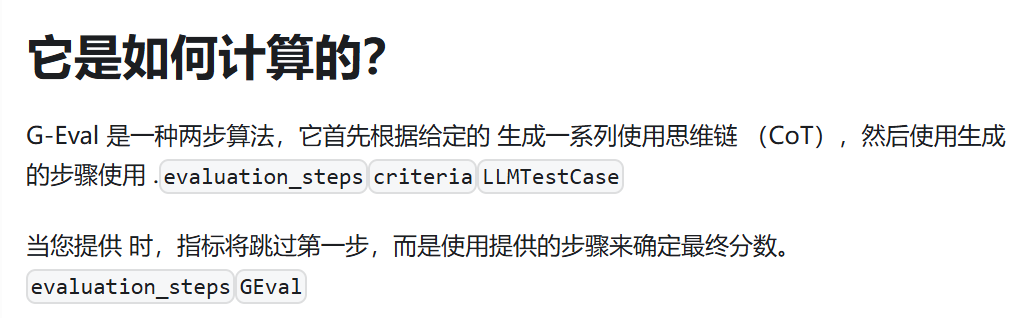

In [4]:
# ÂºïÂÖ•ËØÑ‰º∞ÊåáÊ†á1ÔºöGËØÑ‰º∞

from deepeval.metrics import GEval
from deepeval.test_case import LLMTestCaseParams

correctness_metric = GEval(
    name="Correctness",
    model="gpt-3.5-turbo",
    criteria="Determine whether the actual output is factually correct based on the expected output.",
    evaluation_params=[LLMTestCaseParams.INPUT, LLMTestCaseParams.ACTUAL_OUTPUT],
)

from deepeval.test_case import LLMTestCase

D:\Miniconda3\Lib\site-packages\deepeval\__init__.py:42: UserWarning: You are using deepeval version 0.21.40, however version 0.21.45 is available. You should consider upgrading via the "pip install --upgrade deepeval" command.
  warnings.warn(


Transient error StatusCode.DEADLINE_EXCEEDED encountered while exporting traces to otlp.nr-data.net:4317, retrying in 16s.
Transient error StatusCode.DEADLINE_EXCEEDED encountered while exporting traces to otlp.nr-data.net:4317, retrying in 32s.
Transient error StatusCode.DEADLINE_EXCEEDED encountered while exporting traces to otlp.nr-data.net:4317, retrying in 1s.
Transient error StatusCode.UNAVAILABLE encountered while exporting traces to otlp.nr-data.net:4317, retrying in 32s.


2.ÊåáÊ†á2 ‚Äî‚Äî‚Äî‚Äî ÊëòË¶Å

ÊëòË¶ÅÊåáÊ†á‰ΩøÁî® LLM Êù•Á°ÆÂÆöÊÇ®ÁöÑ LLMÔºàÂ∫îÁî®Á®ãÂ∫èÔºâÊòØÂê¶ÁîüÊàê‰∫Ü‰∫ãÂÆûÊ≠£Á°ÆÁöÑÊëòË¶ÅÔºåÂêåÊó∂ÂåÖÂê´ÂéüÂßãÊñáÊú¨‰∏≠ÁöÑÂøÖË¶ÅËØ¶ÁªÜ‰ø°ÊÅØ„ÄÇ

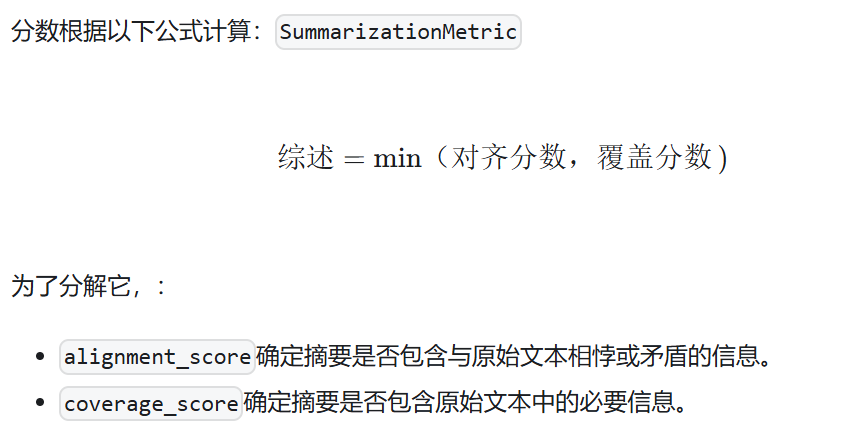

In [5]:
from deepeval import evaluate
from deepeval.metrics import SummarizationMetric
from deepeval.test_case import LLMTestCase
...

# test_case = LLMTestCase(input=input, actual_output=actual_output)
Summarization_metric = SummarizationMetric(
    threshold=0.5,
    model="gpt-3.5-turbo"
)


3.ÊåáÊ†á3 ‚Äî‚Äî‚Äî‚Äî Á≠îÊ°àÁõ∏ÂÖ≥ÊÄß

Á≠îÊ°àÁõ∏ÂÖ≥ÊÄßÊåáÊ†áÈÄöËøáËØÑ‰º∞ LLM Â∫îÁî®Á®ãÂ∫è‰∏éÊèê‰æõÁöÑ .ÁöÑÁ≠îÊ°àÁõ∏ÂÖ≥ÊÄßÊåáÊ†áÊòØ‰∏Ä‰∏™Ëá™ÊàëËß£ÈáäÁöÑ LLM-EvalÔºåËøôÊÑèÂë≥ÁùÄÂÆÉËæìÂá∫ÂÖ∂ÊåáÊ†áÂàÜÊï∞ÁöÑÂéüÂõ†„ÄÇ

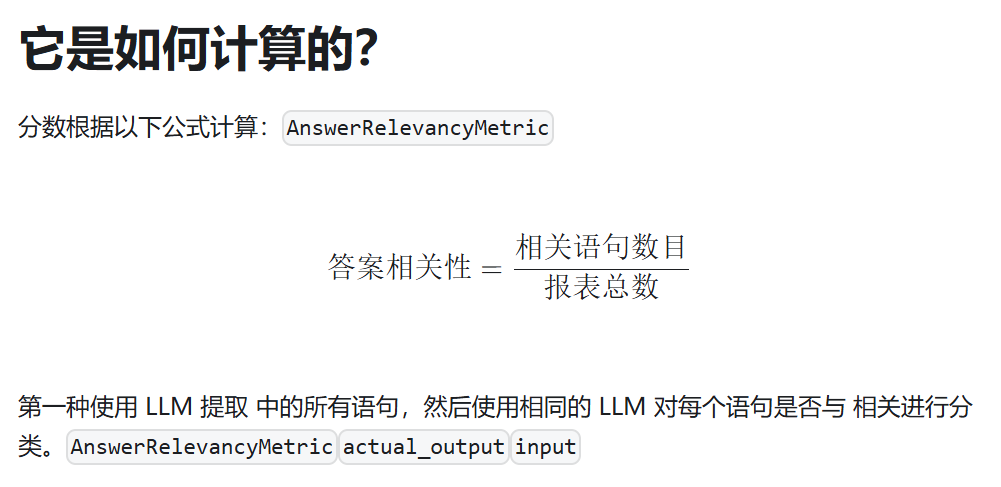

In [6]:
# ÂºïÂÖ•ËØÑ‰º∞ÊåáÊ†á3ÔºöÁ≠îÊ°àÁõ∏ÂÖ≥ÊÄß

from deepeval import evaluate
from deepeval.metrics import AnswerRelevancyMetric
from deepeval.test_case import LLMTestCase

Relevancy_metric = AnswerRelevancyMetric(
    threshold=0.7,
    model="gpt-3.5-turbo",
    include_reason=True
)

4.ÊåáÊ†á4 ‚Äî‚Äî‚Äî‚Äî ‰∏ä‰∏ãÊñáÁõ∏ÂÖ≥ÊÄß

‰∏ä‰∏ãÊñáÁõ∏ÂÖ≥ÊÄßÊåáÊ†áÈÄöËøáËØÑ‰º∞ÁªôÂÆöÁöÑ‰∏ä‰∏ãÊñáÁõ∏ÂÖ≥ÊÄßÊåáÊ†áÊòØ‰∏Ä‰∏™‰∏çË®ÄËá™ÊòéÁöÑ LLM-EvalÔºåËøôÊÑèÂë≥ÁùÄÂÆÉËæìÂá∫ÂÖ∂ÊåáÊ†áÂàÜÊï∞ÁöÑÂéüÂõ†„ÄÇ

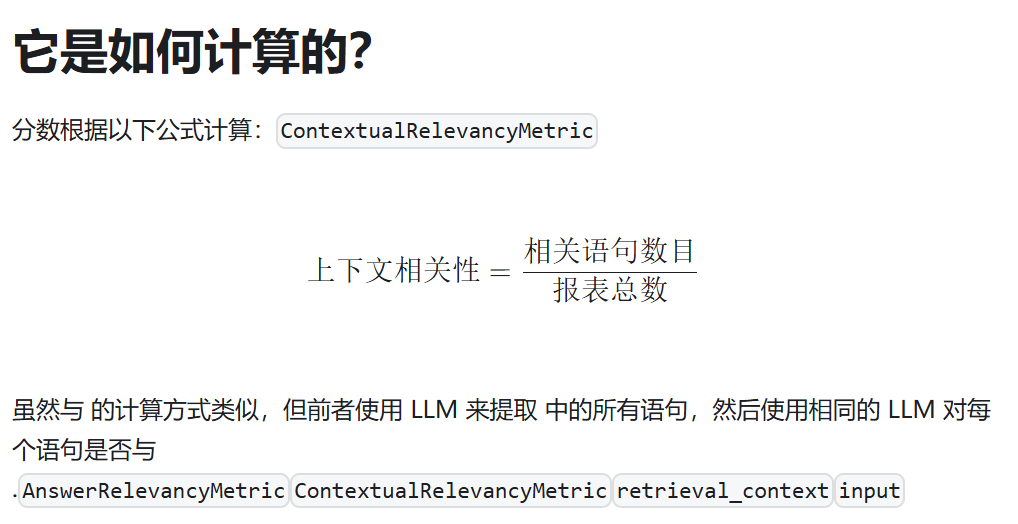

In [7]:
from deepeval import evaluate
from deepeval.metrics import ContextualRelevancyMetric
from deepeval.test_case import LLMTestCase


ContextualRelevancy_metric = ContextualRelevancyMetric(
    threshold=0.7,
    model="gpt-3.5-turbo",
    include_reason=0
)


5.ÊåáÊ†á5 ‚Äî‚Äî‚Äî‚Äî ÂπªËßâ

ËØÑ‰º∞ÂâçÂêéÁüõÁõæÁöÑ‰∏ä‰∏ãÊñáÊï∞Èáè

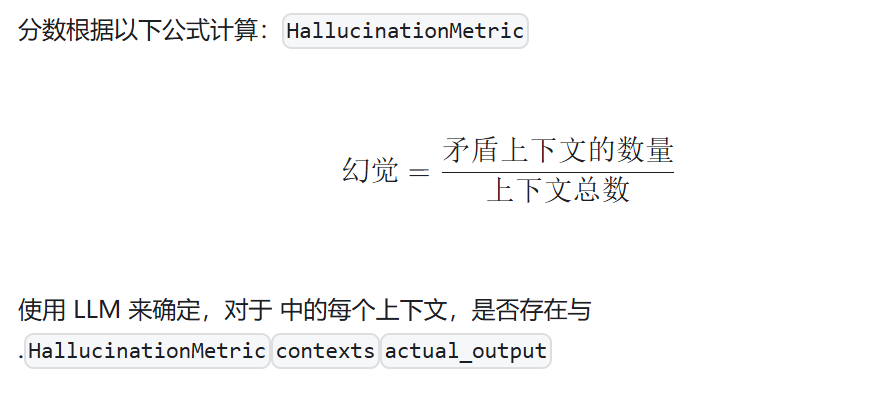

In [8]:
from deepeval import evaluate
from deepeval.metrics import HallucinationMetric
from deepeval.test_case import LLMTestCase

Hallucination_metric = HallucinationMetric(threshold=0.5,model="gpt-3.5-turbo")


### ‰∏â„ÄÅÊ®°Âûã CustomLLM ÂÆö‰πâ„ÄÅËØÑ‰º∞ÂáΩÊï∞ evaluate_responses ÂÆö‰πâ

1.CustomLLM

ÈáåÈù¢ÂèØ‰ª•‰º†ÂÖ•‰∏çÂêåÁöÑquery_engineÂèÇÊï∞ÔºåÊù•ÊµãËØï‰∏çÂêåÁöÑÊ®°Âûã

In [9]:
import gradio as gr
from llama_index.core import VectorStoreIndex
from langchain_openai import OpenAIEmbeddings
from deepeval.models.base_model import DeepEvalBaseLLM

# ÂÆö‰πâËá™ÂÆö‰πâÊ®°Âûã
class CustomLLM(DeepEvalBaseLLM):
    def __init__(self, query_engine):
        self.query_engine = query_engine

    def load_model(self):
        # Âú®Ëøô‰∏™‰æãÂ≠ê‰∏≠ÔºåÊàë‰ª¨‰∏çÈúÄË¶ÅÂä†ËΩΩÈ¢ùÂ§ñÁöÑÊ®°ÂûãÔºåÊâÄ‰ª•Áõ¥Êé•ËøîÂõû query_engine
        return self.query_engine

    def generate(self, prompt: str) -> str:
        response = self.query_engine.query(prompt)
        return response
    
    def query(self, prompt: str) -> str:
        response = self.query_engine.query(prompt)
        return response

    async def a_generate(self, prompt: str) -> str:
        return self.generate(prompt)
    
    def get_model_name(self):
        return "Custom OpenAI Embedding Model"


2.ËØÑ‰º∞ÂáΩÊï∞



In [10]:
# ÂáÜÂ§áÂáΩÊï∞retrieval_context(nodes_r)ÔºåÁî®Êù•ËøîÂõû„ÄÅÊãºÊé•Ê£ÄÁ¥¢Âà∞ÁöÑÊñáÊ°£ÂÜÖÂÆπ
def retrieval_context(nodes_r):
    context_template = " "
    context_ls = []
    for node_r in nodes_r:
        context_template = context_template + node_r.text+"\n"
        context_ls.append(node_r.text)
        
    return context_template,context_ls

In [54]:
from deepeval.metrics import ToxicityMetric
from deepeval.test_case import LLMTestCase

def evaluate_responses(model, questions, expected_outputs):
    
    assert len(questions) == len(expected_outputs), "questions Âíå expected_outputs ÂàóË°®ÈïøÂ∫¶‰∏ç‰∏ÄËá¥"
    
    # Ë∞ÉÁî®‰∏äÈù¢Áü©ÈòµÊù•Ê±ÇÂêÑ‰∏™ËØÑ‰º∞ÊåáÊ†á
    Correctness = correctness_metric
    Summarization = Summarization_metric
    Relevancy = Relevancy_metric
    ContextualRelevancy = ContextualRelevancy_metric
    Hallucination = Hallucination_metric
    
    results = []

    for i, question in enumerate(questions):
        # ÁîüÊàê response
        response = model.generate(question)
        
        # Ê±ÇcontextÂÜÖÂÆπ
        retriever_base = index_OpenAIEmbeddings.as_retriever(similarity_top_k=5)
        nodes_r = retriever_base.retrieve(question)
        context,context_ls = retrieval_context(nodes_r)
        
        # Ê±ÇÂØπÂ∫î expected_output
        expected_output = expected_outputs[i]
        
        # Ê±ÇÂêÑÁßçÊåáÊ†á
        test_case = LLMTestCase(input=question, actual_output=response, 
                                retrieval_context=context_ls, context = context_ls, 
                                expected_output=expected_output)
        Correctness.measure(test_case)
        Summarization.measure(test_case)
        Relevancy.measure(test_case)
        ContextualRelevancy.measure(test_case)
        Hallucination.measure(test_case)
    
        
            
        # ÁîüÊàêresult
        results.append({
            'question': question,
            'response': response,
            'Correctness': Correctness.score,
            'Summarization': Summarization.score,
            'Relevancy': Relevancy.score,
            'ContextualRelevancy': ContextualRelevancy.score,
            'Hallucination': Hallucination.score,
        })
        
    return results

### Âõõ„ÄÅ‰∏çÂêåÁ¥¢ÂºïÁöÑÂª∫Á´ãÔºåÊñπ‰æøÂêéÁª≠ÊµãËØï

ÂèØ‰æõË∞ÉÁî®ÁöÑÁ¥¢ÂºïÊ®°ÂûãÂàÜÂà´ÊòØÔºöindex_OpenAIEmbeddings   index_bge_large_zh   index_bge_M3

In [12]:
from llama_index.core import VectorStoreIndex,DocumentSummaryIndex
# from haystack.indexing.vector_store import VectorStoreIndex
from llama_index.core import KnowledgeGraphIndex
from langchain.vectorstores import FAISS
from langchain_openai import OpenAIEmbeddings

# OpenAIEmbeddings()  
print("OpenAIEmbeddings:")
index_OpenAIEmbeddings = VectorStoreIndex.from_documents(documents = documents, StorageContext = True, embedding = OpenAIEmbeddings(), show_progress = 1)

from langchain.embeddings import HuggingFaceBgeEmbeddings

# bge-large-zh-v1.5
print("bge-large-zh-v1.5:")
bge_embeddings = HuggingFaceBgeEmbeddings(model_name="BAAI/bge-large-zh-v1.5")
index_bge_large_zh = VectorStoreIndex.from_documents(documents = documents, embedding = bge_embeddings, show_progress = 1)

# bge-M3
print("bge-M3:")
bgeM3_embeddings = HuggingFaceBgeEmbeddings(model_name="BAAI/bge-M3")
index_bge_M3 = VectorStoreIndex.from_documents(documents = documents, embedding = bgeM3_embeddings, show_progress = 1)

OpenAIEmbeddings:


Parsing nodes:   0%|          | 0/1 [00:00<?, ?it/s]

Generating embeddings:   0%|          | 0/1277 [00:00<?, ?it/s]

bge-large-zh-v1.5:


Parsing nodes:   0%|          | 0/1 [00:00<?, ?it/s]

Generating embeddings:   0%|          | 0/1277 [00:00<?, ?it/s]

bge-M3:


Parsing nodes:   0%|          | 0/1 [00:00<?, ?it/s]

Generating embeddings:   0%|          | 0/1277 [00:00<?, ?it/s]

### Âõõ„ÄÅÊµãËØïÊ®°ÂûãengineÂÆö‰πâ

ÊµãËØïÈò∂ÊÆµÁöÑÊï¥‰ΩìÊÄùË∑ØÔºö

ÊµãËØï‰∏ÄÂÖ±Ë¶ÅÊµãËØï‰∏âÁßçÂèòÈáèÔºöÂì™Áßçembedding„ÄÅÊòØÂê¶Ê∑∑ÂêàÊ£ÄÁ¥¢„ÄÅÊòØÂê¶Êü•ËØ¢ÈáçÂÜôÔºåÂØπËøô‰∏â‰∏™ÂèòÈáèÂΩ¢ÊàêÁöÑÁªÑÂêàËøõË°å5‰∏™ÊåáÊ†áÁöÑÊµãËØÑ

Ôºà1ÔºâÊµãËØïembedding

ÊéßÂà∂ÂèòÈáèÔºö‰∏çÊ∑∑ÂêàÊ£ÄÁ¥¢„ÄÅ‰∏çÊü•ËØ¢ÈáçÂÜô

ÊµãËØïÔºöÊõ¥Êç¢index_OpenAIEmbeddings„ÄÅindex_bge_large_zh„ÄÅindex_bge_M3ÔºåÁúãÊåáÊ†á

Ôºà2ÔºâÊµãËØïÊ∑∑ÂêàÊ£ÄÁ¥¢

ÊéßÂà∂ÂèòÈáèÔºö‰ΩøÁî®index_OpenAIEmbeddingsÔºå‰∏çÊü•ËØ¢ÈáçÂÜô

ÊµãËØïÔºöÊòØÂê¶Ê∑∑ÂêàÊ£ÄÁ¥¢

Ôºà3ÔºâÊµãËØïÊü•ËØ¢ÈáçÂÜô

ÊéßÂà∂ÂèòÈáèÔºö‰ΩøÁî®index_OpenAIEmbeddingsÔºå‰∏çÊ∑∑ÂêàÊ£ÄÁ¥¢

ÊµãËØïÔºöÊòØÂê¶Êü•ËØ¢ÈáçÂÜô

(‰∏Ä) ÊµãËØï‰∏âÁßçembedding

In [13]:
# ÂàùÂßãÂåñÊ®°Âûã
#########################################################################
emb1_engine = index_OpenAIEmbeddings.as_chat_engine(verbose=True)
index_OpenAIEmbeddings.storage_context

emb1_llm = CustomLLM(query_engine=emb1_engine)

###########################################################################

emb2_engine = index_bge_large_zh.as_chat_engine(verbose=True)
index_bge_large_zh.storage_context

emb2_llm = CustomLLM(query_engine=emb2_engine)

###########################################################################

emb3_engine = index_bge_M3.as_chat_engine(verbose=True)
index_bge_M3.storage_context

emb3_llm = CustomLLM(query_engine=emb3_engine)

Ôºà‰∫åÔºâÊµãËØïÊòØÂê¶Ê∑∑ÂêàÊ£ÄÁ¥¢

È¢ÑÂ§á‰ª£Á†ÅÔºö

In [14]:
# ÂÅáËÆæ documents ÊòØ‰∏Ä‰∏™ÂåÖÂê´ÊñáÊ°£ÂØπË±°ÁöÑÂàóË°®
# ÂÆö‰πâÁ©∫ÁöÑÊñáÊú¨ÂàóË°®ÂíåÂÖÉÊï∞ÊçÆÂàóË°®
doc_texts = []

# ÈÅçÂéÜÊØè‰∏™ÊñáÊ°£ÂØπË±°ÔºåËé∑ÂèñÊñáÊú¨ÂÜÖÂÆπÂíåÂÖÉÊï∞ÊçÆ
for i, doc in enumerate(documents):
    text = doc.text  # ÂÅáËÆæÊñáÊ°£ÂØπË±°Êúâ‰∏Ä‰∏™ text Â±ûÊÄßÁî®‰∫éËé∑ÂèñÊñáÊú¨ÂÜÖÂÆπ
    if text:
        doc_texts.append(text)
    else:
        doc_texts.append("")  # Â¶ÇÊûúÊñáÊú¨ÂÜÖÂÆπ‰∏∫Á©∫ÔºåÊ∑ªÂä†‰∏Ä‰∏™Á©∫Â≠óÁ¨¶‰∏≤


splitted_texts = []
# ÈÅçÂéÜÊØè‰∏™ÊñáÊú¨ÂÜÖÂÆπÔºåÊåâÁÖß "http" ËøõË°åÂàÜÂâ≤
for text in doc_texts:
    # ‰ΩøÁî® split ÊñπÊ≥ïÊåâÁÖß "http" ËøõË°åÂàÜÂâ≤ÔºåÂπ∂Âä†ÂÖ•Âà∞ÂàÜÂâ≤ÂêéÁöÑÊñáÊú¨ÂàóË°®‰∏≠
    splitted_texts.extend(text.split("http"))

# Â∞ùËØïÊ∑∑ÂêàÊ£ÄÁ¥¢ÊñπÂºè
from langchain.retrievers import EnsembleRetriever
from langchain_community.retrievers import BM25Retriever
from langchain_community.vectorstores import FAISS
from langchain_openai import OpenAIEmbeddings

# Â∞ÜÊñáÊ°£ËΩ¨Êç¢‰∏∫ÊñáÊú¨ÂàóË°®ÂíåÂÖÉÊï∞ÊçÆÂàóË°®
doc_metadatas = [{"source": i} for i in range(len(splitted_texts))]
print(len(splitted_texts))

# ÂàùÂßãÂåñBM25Ê£ÄÁ¥¢Âô®
bm25_retriever = BM25Retriever.from_texts(splitted_texts, metadatas = doc_metadatas)
bm25_retriever.k = 3

# ÂàùÂßãÂåñFAISSÊ£ÄÁ¥¢Âô®
embedding = OpenAIEmbeddings()
faiss_vectorstore = FAISS.from_texts(splitted_texts, embedding, metadatas=doc_metadatas)

# Â∞ÜFAISSÂêëÈáèÂ≠òÂÇ®ËΩ¨Âåñ‰∏∫Ê£ÄÁ¥¢Âô®
faiss_retriever = faiss_vectorstore.as_retriever(search_kwargs={"k": 3})

# ÂàùÂßãÂåñEnsemble Retriever
ensemble_retriever = EnsembleRetriever(
    retrievers=[bm25_retriever, faiss_retriever], weights=[0.5, 0.5]
)


1725


Ôºà‰∏âÔºâÊ£ÄÊµãÊòØÂê¶Êü•ËØ¢ÈáçÂÜôÔºàHyDEÔºâ

In [15]:
# HydeÊü•ËØ¢ÈáçÂÜôÁöÑÁªìÊûú

from llama_index.core.indices.query.query_transform import HyDEQueryTransform
from llama_index.core.query_engine import TransformQueryEngine

query_engine = index_bge_M3.as_chat_engine(verbose=True)

### ‰∫î„ÄÅË∞ÉÁî®ÂêÑ‰∏™Ê®°ÂûãËøõÂÖ•ËØÑ‰º∞ÂáΩÊï∞

Ôºà‰∏ÄÔºâ ÂáÜÂ§áÈóÆÈ¢òÈõÜ

In [50]:
def read_questions_from_file(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        questions = file.readlines()
    return [question.strip() for question in questions]

# questions = read_questions_from_file('question/query_new_mini.txt')
questions = read_questions_from_file('question/query_new.txt')

questions

['Âú®ËøôÊ¨°ËΩ¨‰ºöÁ™óÂè£ÔºåÂ∑¥Â°ûÁΩóÈÇ£ËÆ°ÂàíÂ¶Ç‰ΩïÂ§ÑÁêÜË¥¢ÊîøÈóÆÈ¢ò‰ª•ÂºïËøõAmadou OnanaÔºü',
 'Karim BenzemaÂú®Ê≤ôÁâπÈòøÊãâ‰ºØÈÅáÂà∞‰∫ÜÂì™‰∫õÈóÆÈ¢òÔºåËøôÂØπ‰ªñÂíå‰ø±‰πêÈÉ®Êúâ‰ΩïÂΩ±ÂìçÔºü',
 'ÊõºËÅîÁêÉÂëòLisandro MartinezÂèó‰º§ÂêéÔºåÁêÉÈòüÁöÑÊàòÊúØÂíåÈòµÂÆπÂèëÁîü‰∫Ü‰ªÄ‰πàÂèòÂåñÔºü',
 'Ferran TorresÂú®ÊØîËµõ‰∏≠Âêë‰∏ÄÂêçÁôåÁóáÊÇ£ËÄÖËá¥Êï¨ÔºåËøôÂØπÁêÉÂëòÂíåÁêÉËø∑Êúâ‰ΩïÊÑè‰πâÔºü',
 '‰∏∫‰ªÄ‰πàTakehiro TomiyasuÂú®ÂØπÈòµWest Ham UnitedÁöÑÊØîËµõ‰∏≠Áº∫Â∏≠Ôºü‰ªñ‰ΩïÊó∂ÂèØËÉΩ‰ºöÈáçËøîÈòµÂÆπÔºü',
 'Â∑¥Â°ûÁΩóÈÇ£Ë¢´VillarrealÈáçÂàõÂêéÔºå‰ªñ‰ª¨‰∏éÁöáÈ©¨ÁöÑÁßØÂàÜÂ∑ÆÂ§öÂ∞ëÔºüËøôÂØπÂ∑¥Ëê®ÁöÑËÅîËµõÂâçÊôØÊúâ‰ΩïÂΩ±ÂìçÔºü',
 'Cole PalmerÂú®ÂàáÂ∞îË•øÂØπÈòµÊ∞¥Êô∂ÂÆ´ÁöÑÊØîËµõ‰∏≠Ë°®Áé∞Âá∫Ëâ≤Ôºå‰ªñÊèêÂà∞‰∫ÜMauricio PochettinoÂú®ËÉúÂà©‰∏≠ÁöÑ‰ΩúÁî®ÊòØ‰ªÄ‰πàÔºü',
 'Âú®ÂØπÈòµÈòøÊñØÈ°øÁª¥ÊãâÁöÑÊØîËµõ‰∏≠ÔºåÂàáÂ∞îË•øÁöÑÁêÉËø∑Âª∫ËÆÆÁöÑÁªàÊûÅÈòµÂÆπÊòØ‰ªÄ‰πàÔºü',
 'Âú®ÂØπÈòµÊâòÁâπÁ∫≥ÂßÜÁÉ≠Âà∫ÁöÑÊØîËµõ‰∏≠ÔºåÊõºËÅîÁêÉËø∑ÂØπÈ©¨Â∫ìÊñØ¬∑Êãâ‰ªÄÁ¶èÂæ∑ÁöÑË°®Áé∞Êúâ‰ªÄ‰πàÊÑèËßÅÔºü',
 'ÂêâÂÆâË∑ØÊòìÂêâ¬∑Â∏ÉÂÜØË°®Á§∫Âú®‰ªñËÅå‰∏öÁîüÊ∂Ø

In [51]:
expected_output = [
    "Â∑¥Â°ûÁΩóÈÇ£ËÆ°ÂàíÈÄöËøáÂá∫ÂîÆ‰∏Ä‰∫õÁêÉÂëòÊù•Á≠πÈõÜËµÑÈáëÔºåÂèØËÉΩ‰ºöÂ∞ÜFrenkie De JongÂíåRonald AraujoÂàóÂÖ•Âá∫ÂîÆÂêçÂçïÔºå‰ª•‰æøË¥≠‰π∞Amadou Onana„ÄÇ",
    "Karim Benzema‰∏éAl IttihadÁöÑ‰∏ªÊïôÁªÉMarcelo GallardoÂèëÁîü‰∫ÜÂÜ≤Á™ÅÔºåËøôÂèØËÉΩÂØπ‰ªñÂú®‰ø±‰πêÈÉ®ÁöÑÊú™Êù•‰∫ßÁîüÂΩ±ÂìçÔºåÂπ∂ÂèØËÉΩÂΩ±ÂìçÁêÉÈòüÁöÑÊ∞õÂõ¥ÂíåÊàòÁª©„ÄÇ",
    "Lisandro MartinezÂèó‰º§ÂêéÔºåÊõºËÅîÂèØËÉΩÈúÄË¶ÅË∞ÉÊï¥‰ªñ‰ª¨ÁöÑÈò≤ÂÆàÁªÑÁªáÂíå‰∏≠Âú∫ÈÖçÁΩÆÔºåÂèØËÉΩ‰ºöÂΩ±Âìç‰ªñ‰ª¨Âú®ÊØîËµõ‰∏≠ÁöÑË°®Áé∞ÂíåÊàòÊúØÈ£éÊ†º„ÄÇ",
    "Ferran TorresÁöÑËøô‰∏™‰∏æÂä®Â±ïÁé∞‰∫Ü‰ªñÁöÑ‰∫∫ÈÅì‰∏ª‰πâÁ≤æÁ•ûÂíåÂØπÁêÉËø∑ÁöÑÂÖ≥ÊÄÄÔºåËøôÂèØËÉΩ‰ºöËµ¢ÂæóÊõ¥Â§öÁêÉËø∑ÁöÑÊîØÊåÅÂíåÂ∞äÈáçÔºåÂêåÊó∂‰πü‰∏∫ÁêÉËø∑Â∏¶Êù•‰∫ÜÊ∏©ÊöñÂíåÈºìËàû„ÄÇ",
    "Takehiro TomiyasuÂõ†‰∏∫ÂõΩÂÆ∂ÈòüÊØîËµõÂêéÂá∫Áé∞‰∫ÜÂ∞è‰º§ÔºåÊâÄ‰ª•Áº∫Â∏≠‰∫ÜÊØîËµõ„ÄÇÁõÆÂâçÂ∞ö‰∏çÊ∏ÖÊ•ö‰ªñ‰ΩïÊó∂ÂèØ‰ª•ÈáçËøîÈòµÂÆπÔºå‰ΩÜÂ∏åÊúõ‰ªñÁöÑ‰º§ÂäøÂè™ÊòØËΩªÂæÆÁöÑÈóÆÈ¢ò„ÄÇ",
    "Â∑¥Â°ûÁΩóÈÇ£Âú®‰∏ªÂú∫Ë¢´Villarreal‰ª•5-3ÂáªË¥•ÔºåÂØºËá¥‰ªñ‰ª¨‰∏éÁöáÈ©¨ÁöÑÁßØÂàÜÂ∑ÆË∑ùËææÂà∞‰∫Ü10ÂàÜ„ÄÇËøôÂØπÂ∑¥Ëê®Êú¨ËµõÂ≠£ÁöÑËÅîËµõÂâçÊôØÈÄ†Êàê‰∫Ü‰∏çÂ∞èÁöÑÂΩ±ÂìçÔºå‰ΩøÂæó‰ªñ‰ª¨ÁöÑÂÜ†ÂÜõÂ∏åÊúõÂèóÂà∞ÊåëÊàò„ÄÇ",
    "Cole PalmerÊèêÂà∞‰∫ÜMauricio PochettinoÂú®ËÉúÂà©‰∏≠ÁöÑ‰ΩúÁî®ÔºåÁß∞Ëµû‰∫Ü‰ªñÁöÑÊåáÂØºÂíåÊîØÊåÅÔºåËÆ§‰∏∫PochettinoÂØπÁêÉÈòüÁöÑÂáùËÅöÂäõÂíå‰ø°ÂøÉÁªô‰∫à‰∫ÜÂæàÂ§ßÁöÑÂ∏ÆÂä©„ÄÇËøôË°®Êòé‰∫ÜPochettinoÂú®ÂàáÂ∞îË•øÁöÑ‰ΩúÁî®ÂíåÂΩ±Âìç„ÄÇ",
    "PetrovicÔºõËø™Ëê®Ë•ø„ÄÅËíÇ‰∫öÊàà¬∑Â∏≠Â∞îÁì¶„ÄÅÂ∑¥Ëø™‰∫öÂ∏åÂ∞îÔºõÂ•áÂ∞îÁª¥Â∞î„ÄÅÂáØÂ°ûÂ§ö„ÄÅÊÅ©‰Ωê„ÄÅÂè§ÊñØÊâòÔºõÂ∏ïÂ∞îÈªò„ÄÅÊù∞ÂÖãÈÄä„ÄÅÊÅ©ÊòÜÂ∫ì„ÄÇ",
    "Â∞ΩÁÆ°Êãâ‰ªÄÁ¶èÂæ∑ÊâìÂÖ•‰∏ÄÁêÉÔºå‰ΩÜÊúâ‰∏ÄÈÉ®ÂàÜÁêÉËø∑ÂØπ‰ªñÁöÑË°®Áé∞‰∏çÊª°ÊÑèÔºåËÆ§‰∏∫‰ªñÂÜ≥Á≠ñÁ≥üÁ≥ïÔºåÂΩ±Âìç‰∫ÜÁêÉÈòüËøõÊîª„ÄÇÊúâÁêÉËø∑ÁîöËá≥ÂëºÂêÅÊõºËÅîÂú®Â§èÂ≠£Â∞Ü‰ªñÂá∫ÂîÆ„ÄÇ",
    "Â∏ÉÂÜØË°®Á§∫ÊòØÂÖãÈáåÊñØËíÇ‰∫öËØ∫¬∑ÁΩóÁ∫≥Â∞îÂ§öÔºåÊÄªÊòØËÉΩÂú®ÊØîËµõ‰∏≠ÊîªÁ†¥‰ªñÁöÑÁêÉÈó®ÔºåÂ∞§ÂÖ∂ÊòØ2018Âπ¥Ê¨ßÂÜ†ÂõõÂàÜ‰πã‰∏ÄÂÜ≥Ëµõ‰∏≠ÁöÑÂÄíÈí©ËøõÁêÉ„ÄÇ",
    "ËíÇ‰∫öÊàà¬∑Â∏≠Â∞îÁì¶ÂÜíÁùÄÂèó‰º§ÁöÑÈ£éÈô©ÔºåÂ∞ÅÂ†µ‰∫ÜÈ©¨ÁâπÂ°îÁöÑ‰∏ÄÊ¨°Â∞ÑÈó®Ôºå‰ΩÜÂú®Ê≠§ËøáÁ®ã‰∏≠ËÑöË∏ùÊâ≠‰º§ÔºåË¢´Âà©Áª¥¬∑ÁßëÂ∞îÂ®ÅÂ∞îÊõøÊç¢‰∏ãÂú∫„ÄÇ",
    "Â••Âà©¬∑Ê≤ÉÁâπÈáëÊñØ (Ollie Watkins)",
    "ÊôÆÈõ∑ÊñØÈ°øÂåóÂå∫ (Preston North End)",
    "Âπ≥Â±Ä",
    "1-1",
    "ÂÖãÊ¥õÊôÆË°®Á§∫‰ªñ‰∏ç‰ºöÊîπÂèòÈ¶ñÂèëÈòµÂÆπÔºå‰ΩÜÂú®ÊØîËµõÂêéÂèØËÉΩ‰ºöÊúâ‰∏çÂêåÁöÑÊÉ≥Ê≥ï„ÄÇ",
    "ÂÖãÊ¥õÊôÆËÆ§‰∏∫ÁêÉÈòüÈúÄË¶ÅË∏¢ÂæóÊõ¥Â•ΩÔºåÂπ∂Âú®Êé•‰∏ãÊù•ÁöÑÊØîËµõ‰∏≠Â±ïÁé∞Âá∫Êõ¥Â•ΩÁöÑË∂≥ÁêÉÊ∞¥Âπ≥„ÄÇ",
    "‰∏§‰∏™",
    "‰∏ªÊïôÁªÉÂú®‰∏≠Âú∫‰ºëÊÅØÊó∂ÊîπÂèò‰∫ÜÁêÉÈòüÂú®ÂØπÊñπÂçäÂú∫ÁöÑÁªìÊûÑÔºå‰ΩøÁêÉÈòüÂú®‰∏ãÂçäÂú∫ÂàõÈÄ†‰∫ÜÊõ¥Â§öÊú∫‰ºö„ÄÇ",
    "ËøàÈòøÂØÜÂõΩÈôÖ"
]

Ôºà‰∫åÔºâÊµãËØïembedding

In [ ]:
results_emb1 = evaluate_responses(emb1_llm, questions, expected_output)
print(len(results_emb1))

In [ ]:
results_emb2 = evaluate_responses(emb2_llm, questions, expected_output)

In [ ]:
results_emb3 = evaluate_responses(emb3_llm, questions, expected_output)

In [61]:
import csv

filepath_emb1 = "evaluate_output/embedding_eva/emb1.csv"
filepath_emb2 = "evaluate_output/embedding_eva/emb2.csv"
filepath_emb3 = "evaluate_output/embedding_eva/emb3.csv"

fieldnames = ['Question', 'Response', 'Correctness', 'Summarization','Relevancy','ContextualRelevancy',"Hallucination"]

def write_outcome(filepath,results):
    with open(filepath, mode='w', newline='') as file:
        writer = csv.DictWriter(file,fieldnames)
        
        # ÂÜôÂÖ•Ë°®Â§¥
        writer.writeheader()
        
        print(len(results))
        # ÈÅçÂéÜÁªìÊûúÂàóË°®ÔºåÈÄêË°åÂÜôÂÖ•Êï∞ÊçÆ
        for result in results:
            writer.writerow({'Question': result['question'],
                            'Response': result['response'],
                            'Correctness': result['Correctness'],
                            'Summarization': result['Summarization'],
                            'Relevancy': result['Relevancy'],
                            'ContextualRelevancy': result['ContextualRelevancy'],
                            'Hallucination': result['Hallucination']})

    print(f"Results written to {filepath}")
    
write_outcome(filepath_emb1,results_emb1)
write_outcome(filepath_emb2,results_emb2)
write_outcome(filepath_emb3,results_emb3)

20
Results written to evaluate_output/embedding_eva/emb1.csv
20
Results written to evaluate_output/embedding_eva/emb2.csv
9
Results written to evaluate_output/embedding_eva/emb3.csv


In [87]:
def get_mean(results):
    
    correctness_values = [result['Correctness'] for result in results]
    summarization_values = [result['Summarization'] for result in results]
    relevancy_values = [result['Relevancy'] for result in results]
    contextual_relevancy_values = [result['ContextualRelevancy'] for result in results]
    hallucination_values = [result['Hallucination'] for result in results]
    
    # ËÆ°ÁÆóÂùáÂÄº
    correctness_mean = sum(correctness_values) / len(correctness_values)
    summarization_mean = sum(summarization_values) / len(summarization_values)
    relevancy_mean = sum(relevancy_values) / len(relevancy_values)
    contextual_relevancy_mean = sum(contextual_relevancy_values) / len(contextual_relevancy_values)
    hallucination_mean = sum(hallucination_values) / len(hallucination_values)

    # ËøîÂõûÂùáÂÄº
    mean_values = {
        'Correctness': correctness_mean,
        # 'Summarization': summarization_mean,
        'Relevancy': relevancy_mean,
        'ContextualRelevancy': contextual_relevancy_mean,
        'Hallucination': hallucination_mean
    }
    
    return mean_values

print("results_emb1:")
mean_emb1 = get_mean(results_emb1)
print(get_mean(results_emb1))

print("results_emb2:")
mean_emb2 = get_mean(results_emb2)
print(get_mean(results_emb2))

print("results_emb3:")
mean_emb3 = get_mean(results_emb3)
print(get_mean(results_emb3))


results_emb1:
{'Correctness': 0.7699292935231512, 'Relevancy': 0.9650000000000001, 'ContextualRelevancy': 0.14, 'Hallucination': 0.9828571428571429}
results_emb2:
{'Correctness': 0.7234596724793214, 'Relevancy': 0.9025000000000001, 'ContextualRelevancy': 0.16000000000000003, 'Hallucination': 0.89}
results_emb3:
{'Correctness': 0.7402808995251274, 'Relevancy': 0.8148148148148148, 'ContextualRelevancy': 0.2222222222222222, 'Hallucination': 0.9444444444444444}


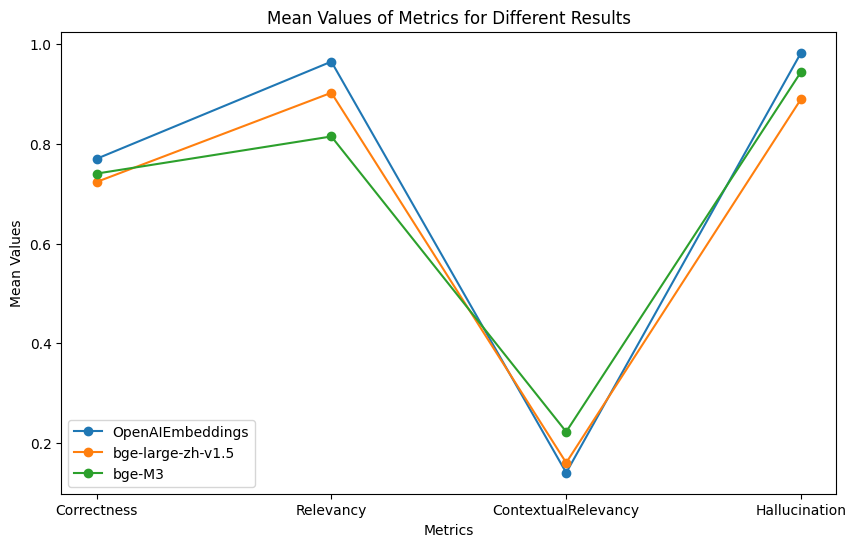

In [94]:
import matplotlib.pyplot as plt

# ÁªòÂà∂ÊäòÁ∫øÂõæ
plt.figure(figsize=(10, 6))

# ÂÆö‰πâÊåáÊ†á
metrics = list(mean_emb1.keys())

# ÁªòÂà∂ÂêÑÊù°Á∫ø
plt.plot(metrics, list(mean_emb1.values()), marker='o', label='OpenAIEmbeddings')
plt.plot(metrics, list(mean_emb2.values()), marker='o', label='bge-large-zh-v1.5')
plt.plot(metrics, list(mean_emb3.values()), marker='o', label='bge-M3')

# ËÆæÁΩÆÂõæ‰æãÂíåÊ†áÁ≠æ
plt.xlabel('Metrics')
plt.ylabel('Mean Values')
plt.title('Mean Values of Metrics for Different Results')
plt.legend()

# ÊòæÁ§∫ÂõæÂΩ¢
plt.show()

‰∏â„ÄÅÊµãËØïÊ∑∑ÂêàÊ£ÄÁ¥¢

In [ ]:
from deepeval.metrics import ToxicityMetric
from deepeval.test_case import LLMTestCase

def evaluate_responses(model, questions, expected_outputs):
    
    assert len(questions) == len(expected_outputs), "questions Âíå expected_outputs ÂàóË°®ÈïøÂ∫¶‰∏ç‰∏ÄËá¥"
    
    # Ë∞ÉÁî®‰∏äÈù¢Áü©ÈòµÊù•Ê±ÇÂêÑ‰∏™ËØÑ‰º∞ÊåáÊ†á
    Correctness = correctness_metric
    Summarization = Summarization_metric
    Relevancy = Relevancy_metric
    ContextualRelevancy = ContextualRelevancy_metric
    Hallucination = Hallucination_metric
    
    results = []

    for i, question in enumerate(questions):
        # ÁîüÊàê response
        response = model.generate(question)
        
        # Ê±ÇcontextÂÜÖÂÆπ
        retriever_base = index_OpenAIEmbeddings.as_retriever(similarity_top_k=5)
        nodes_r = retriever_base.retrieve(question)
        context,context_ls = retrieval_context(nodes_r)
        
        # Ê±ÇÂØπÂ∫î expected_output
        expected_output = expected_outputs[i]
        
        # Ê±ÇÂêÑÁßçÊåáÊ†á
        test_case = LLMTestCase(input=question, actual_output=response, 
                                retrieval_context=context_ls, context = context_ls, 
                                expected_output=expected_output)
        Correctness.measure(test_case)
        Summarization.measure(test_case)
        Relevancy.measure(test_case)
        ContextualRelevancy.measure(test_case)
        Hallucination.measure(test_case)
    
        
            
        # ÁîüÊàêresult
        results.append({
            'question': question,
            'response': response,
            'Correctness': Correctness.score,
            'Summarization': Summarization.score,
            'Relevancy': Relevancy.score,
            'ContextualRelevancy': ContextualRelevancy.score,
            'Hallucination': Hallucination.score,
        })
        
    return results

In [64]:
def evaluate_responses_ensemble(model, questions, ensemble_retriever,expected_outputs):
    
    assert len(questions) == len(expected_outputs), "questions Âíå expected_outputs ÂàóË°®ÈïøÂ∫¶‰∏ç‰∏ÄËá¥"
    
    # Ë∞ÉÁî®‰∏äÈù¢Áü©ÈòµÊù•Ê±ÇÂêÑ‰∏™ËØÑ‰º∞ÊåáÊ†á
    Correctness = correctness_metric
    Summarization = Summarization_metric
    Relevancy = Relevancy_metric
    ContextualRelevancy = ContextualRelevancy_metric
    Hallucination = Hallucination_metric
    
    results = []

    for i, question in enumerate(questions):
        
        # ‰ΩøÁî®Ensemble RetrieverËøõË°åÊ£ÄÁ¥¢
        docs = ensemble_retriever.invoke(question)  # ‰ΩøÁî®ÈóÆÈ¢òËÄå‰∏çÊòØÁ°¨ÁºñÁ†ÅÁöÑquery
        
        # Â∞ÜÁõ∏ÂÖ≥ÊñáÊ°£ÂÜÖÂÆπÁªÑÂêàÊàê‰∏Ä‰∏™Â≠óÁ¨¶‰∏≤Ôºå‰º†ÈÄíÁªôquery_engine
        doc_contents = "\n".join([doc.page_content for doc in docs])
        combined_query = f"ÊàëÁöÑÈóÆÈ¢òÊòØÔºö{question}„ÄÇÊàëÂ∑≤Áü•‰∏ãÈù¢Ëøô‰∫õ‰ø°ÊÅØÔºö{doc_contents}„ÄÇËØ∑‰Ω†Ê†πÊçÆËøô‰∫õÂÜÖÂÆπÂõûÁ≠î„ÄÇ"
        
        # ‰ΩøÁî®query_engineËøõË°åÊÄªÁªìÂíåÂõûÁ≠î
        response = model.generate(combined_query)
        
        # Ê±ÇcontextÂÜÖÂÆπ
        context_ls = []
        
        docs = ensemble_retriever.invoke(question)
        for doc in docs:
            context_ls.append(doc.page_content)
   
        # Ê±ÇÂØπÂ∫î expected_output
        expected_output = expected_outputs[i]
        
        # Ê±ÇÂêÑÁßçÊåáÊ†áÔºàËøôÈáåÁúÅÁï•ÊÇ®ÂéüÂÖàÁöÑ‰ª£Á†ÅÔºåÁõ¥Êé•Â∞ÜËÆ°ÁÆóÊåáÊ†áÁöÑÈÉ®ÂàÜÊîæÂú®ËøôÈáåÔºâ
        # Ê±ÇÂêÑÁßçÊåáÊ†á
        test_case = LLMTestCase(input=question, actual_output=response, 
                                retrieval_context=context_ls, context = context_ls, 
                                expected_output=expected_output)
        
        Correctness.measure(test_case)
        Summarization.measure(test_case)
        Relevancy.measure(test_case)
        ContextualRelevancy.measure(test_case)
        Hallucination.measure(test_case)
        
        # ÁîüÊàêresult
        results.append({
            'question': question,
            'response': response,
            'Correctness': Correctness.score,
            'Summarization': Summarization.score,
            'Relevancy': Relevancy.score,
            'ContextualRelevancy': ContextualRelevancy.score,
            'Hallucination': Hallucination.score,
        })
        
    return results


In [ ]:
result_ensemble = evaluate_responses_ensemble(emb1_llm, questions, ensemble_retriever, expected_output)

In [89]:
print(result_ensemble)

[{'question': 'Âú®ËøôÊ¨°ËΩ¨‰ºöÁ™óÂè£ÔºåÂ∑¥Â°ûÁΩóÈÇ£ËÆ°ÂàíÂ¶Ç‰ΩïÂ§ÑÁêÜË¥¢ÊîøÈóÆÈ¢ò‰ª•ÂºïËøõAmadou OnanaÔºü', 'response': Response(response='Ê†πÊçÆÊü•ËØ¢ÁªìÊûúÔºåÂ∑¥Â°ûÁΩóÈÇ£ËÆ°ÂàíÂ§ÑÁêÜË¥¢ÊîøÈóÆÈ¢ò‰ª•ÂºïËøõAmadou OnanaÁöÑÊñπÊ≥ïÊòØËÄÉËôëÁ≠æÁ∫¶È¢ÑÁÆóÈÄâÈ°πÔºåÂØªÊâæ‰ª∑Ê†ºËæÉ‰ΩéÁöÑË¥®ÈáèÁêÉÂëò„ÄÇËøôÁßçÊñπÊ≥ï‰Ωø‰ªñ‰ª¨ÊúâÂèØËÉΩÂú®‰∏çË∂ÖÂá∫Ë¥¢Âä°ÈôêÂà∂ÁöÑÊÉÖÂÜµ‰∏ãÂºïËøõÁêÉÂëòÔºåÂ¶ÇAmadou Onana„ÄÇ‰ª•‰∏ãÊòØ‰∏Ä‰∫õÈ¢ÑÁÆóËΩ¨‰ºöÈÄâÈ°πÔºåÂ∑¥Â°ûÁΩóÈÇ£ÂèØ‰ª•ËÄÉËôë‰Ωú‰∏∫‰∏ã‰∏Ä‰∏™Á≠æÁ∫¶ÂØπË±°ÔºöAboubakary KoitaÔºàÊØõÈáåÂ°îÂ∞º‰∫öÔºâ„ÄÅLogan CostaÔºà‰ΩõÂæóËßíÔºâ„ÄÅLamine CamaraÔºàÂ°ûÂÜÖÂä†Â∞îÔºâÂíåKamory DoumbiaÔºàÈ©¨ÈáåÔºâ„ÄÇÂüÉÂºóÈ°øÁöÑAmadou OnanaÁöÑ‰ª∑Ê†ºÊ†áÁ≠æ‰∏∫50‰∏áÊ¨ßÂÖÉÔºåËøô‰∏ÄÈ´ò‰º∞ÂÄºÂèØËÉΩ‰ºöÂØπÂ∑¥Â°ûÁΩóÈÇ£ÊûÑÊàêÊåëÊàòÔºåÂõ†‰∏∫‰ªñ‰ª¨ÂÄæÂêë‰∫éÂØªÊâæÂ∏ÇÂú∫‰∏äÊõ¥‰æøÂÆúÁöÑÈÄâÈ°π‰ª•ÈÅµÂÆàË¥¢Âä°ÂÖ¨Âπ≥Á´ûËµõËßÑÂàô„ÄÇÂ∑¥Â°ûÁΩóÈÇ£ÁöÑÁ≠ñÁï•ÊòØÈÄöËøáÁ≠æÁ∫¶ËæÉ‰ΩéË¥πÁî®ÊàñËá™Áî±ÁêÉÂëòÊù•Á≠æÁ∫¶ÁêÉÂëòÔºåÊ≠£Â¶Ç‰ªñ‰ª¨‰πãÂâçÁ≠æÁ∫¶ÁöÑOriol RomeuÔºà320‰∏áÊ¨ßÂÖÉÔºâ„ÄÅIlkay GundoganÂíåInigo MartinezÁ≠âËá™Áî±ÁêÉÂëò„

In [67]:
filepath_ensemble = "evaluate_output/ensemble_eva/ensemble.csv"

fieldnames = ['Question', 'Response', 'Correctness', 'Summarization','Relevancy','ContextualRelevancy',"Hallucination"]

def write_outcome(filepath,results):
    with open(filepath, mode='w', newline='') as file:
        writer = csv.DictWriter(file,fieldnames)
        
        # ÂÜôÂÖ•Ë°®Â§¥
        writer.writeheader()
        
        print(len(results))
        # ÈÅçÂéÜÁªìÊûúÂàóË°®ÔºåÈÄêË°åÂÜôÂÖ•Êï∞ÊçÆ
        for result in results:
            writer.writerow({'Question': result['question'],
                            'Response': result['response'],
                            'Correctness': result['Correctness'],
                            'Summarization': result['Summarization'],
                            'Relevancy': result['Relevancy'],
                            'ContextualRelevancy': result['ContextualRelevancy'],
                            'Hallucination': result['Hallucination']})

    print(f"Results written to {filepath}")
    
write_outcome(filepath_ensemble,result_ensemble)

20
Results written to evaluate_output/ensemble_eva/ensemble.csv


In [68]:
print("result_ensemble:")
mean_ensemble = get_mean(result_ensemble)
print(get_mean(result_ensemble))

result_ensemble:
{'Correctness': 0.6528374506104946, 'Relevancy': 0.76, 'ContextualRelevancy': 0.155, 'Hallucination': 0.8800000000000001}


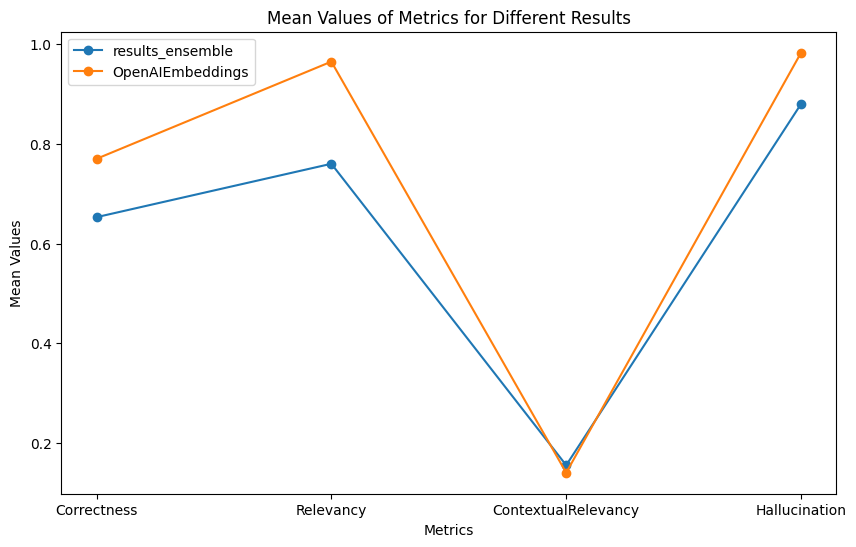

In [95]:
import matplotlib.pyplot as plt

# ÁªòÂà∂ÊäòÁ∫øÂõæ
plt.figure(figsize=(10, 6))

# ÂÆö‰πâÊåáÊ†á
metrics = list(mean_ensemble.keys())

# ÁªòÂà∂ÂêÑÊù°Á∫ø
plt.plot(metrics, list(mean_ensemble.values()), marker='o', label='results_ensemble')
plt.plot(metrics, list(mean_emb1.values()), marker='o', label='OpenAIEmbeddings')


# ËÆæÁΩÆÂõæ‰æãÂíåÊ†áÁ≠æ
plt.xlabel('Metrics')
plt.ylabel('Mean Values')
plt.title('Mean Values of Metrics for Different Results')
plt.legend()

# ÊòæÁ§∫ÂõæÂΩ¢
plt.show()

### Âõõ„ÄÅÊµãËØïÊü•ËØ¢ÈáçÂÜô

Ôºà‰∏ÄÔºâÈ¢ÑÂ§á‰ª£Á†Å

In [73]:
from llama_index.core.indices.query.query_transform import HyDEQueryTransform
from llama_index.core.query_engine import TransformQueryEngine

def evaluate_responses_hyde(model, questions, expected_outputs):
    
    Correctness = correctness_metric
    Summarization = Summarization_metric
    Relevancy = Relevancy_metric
    ContextualRelevancy = ContextualRelevancy_metric
    Hallucination = Hallucination_metric
    
    results = []
    
    query_engine = index_OpenAIEmbeddings.as_chat_engine(verbose=True)
    hyde = HyDEQueryTransform(include_original=True)
    hyde_query_engine = TransformQueryEngine(query_engine, hyde)
    
    for i, question in enumerate(questions):
        
        response = hyde_query_engine.query(question)
        
        # Ê±ÇcontextÂÜÖÂÆπ
        retriever_base = index_OpenAIEmbeddings.as_retriever(similarity_top_k=4)
        nodes_r = retriever_base.retrieve(question)
        context,context_ls = retrieval_context(nodes_r)
        
        # Ê±ÇÂØπÂ∫î expected_output
        expected_output = expected_outputs[i]
        
        # Ê±ÇÂêÑÁßçÊåáÊ†á
        test_case = LLMTestCase(input=question, actual_output=response, 
                                retrieval_context=context_ls, context = context_ls, 
                                expected_output=expected_output)
        Correctness.measure(test_case)
        Summarization.measure(test_case)
        Relevancy.measure(test_case)
        ContextualRelevancy.measure(test_case)
        Hallucination.measure(test_case)
        
        # ÁîüÊàêresult
        results.append({
            'question': question,
            'response': response,
            'Correctness': Correctness.score,
            'Summarization': Summarization.score,
            'Relevancy': Relevancy.score,
            'ContextualRelevancy': ContextualRelevancy.score,
            'Hallucination': Hallucination.score,
        })
        
    return results

In [77]:
result_hyde = evaluate_responses_hyde(emb1_llm, questions,expected_output)

Retrying llama_index.llms.openai.base.OpenAI._chat in 0.6091210601050329 seconds as it raised RateLimitError: Error code: 429 - {'error': {'message': 'You exceeded your current quota, please check your plan and billing details. For more information on this error, read the docs: https://platform.openai.com/docs/guides/error-codes/api-errors.', 'type': 'insufficient_quota', 'param': None, 'code': 'insufficient_quota'}}.
Retrying llama_index.llms.openai.base.OpenAI._chat in 0.018062855919336984 seconds as it raised RateLimitError: Error code: 429 - {'error': {'message': 'You exceeded your current quota, please check your plan and billing details. For more information on this error, read the docs: https://platform.openai.com/docs/guides/error-codes/api-errors.', 'type': 'insufficient_quota', 'param': None, 'code': 'insufficient_quota'}}.
Retrying llama_index.llms.openai.base.OpenAI._chat in 3.311644334141458 seconds as it raised RateLimitError: Error code: 429 - {'error': {'message': 'You 

KeyboardInterrupt: 

In [72]:
filepath_hyde = "evaluate_output/HyDE/hyde.csv"

fieldnames = ['Question', 'Response', 'Correctness', 'Summarization','Relevancy','ContextualRelevancy',"Hallucination"]

def write_outcome(filepath,results):
    with open(filepath, mode='w', newline='') as file:
        writer = csv.DictWriter(file,fieldnames)
        
        # ÂÜôÂÖ•Ë°®Â§¥
        writer.writeheader()
        
        print(len(results))
        # ÈÅçÂéÜÁªìÊûúÂàóË°®ÔºåÈÄêË°åÂÜôÂÖ•Êï∞ÊçÆ
        for result in results:
            writer.writerow({'Question': result['question'],
                            'Response': result['response'],
                            'Correctness': result['Correctness'],
                            'Summarization': result['Summarization'],
                            'Relevancy': result['Relevancy'],
                            'ContextualRelevancy': result['ContextualRelevancy'],
                            'Hallucination': result['Hallucination']})

    print(f"Results written to {filepath}")
    
write_outcome(filepath_hyde,result_hyde)

9
Results written to evaluate_output/HyDE/hyde.csv


In [90]:
print("result_hyde:")
mean_hyde = get_mean(result_hyde)
print(get_mean(result_hyde))

result_hyde:
{'Correctness': 0.6877464855067571, 'Relevancy': 1.0, 'ContextualRelevancy': 0.2777777777777778, 'Hallucination': 0.9619047619047618}


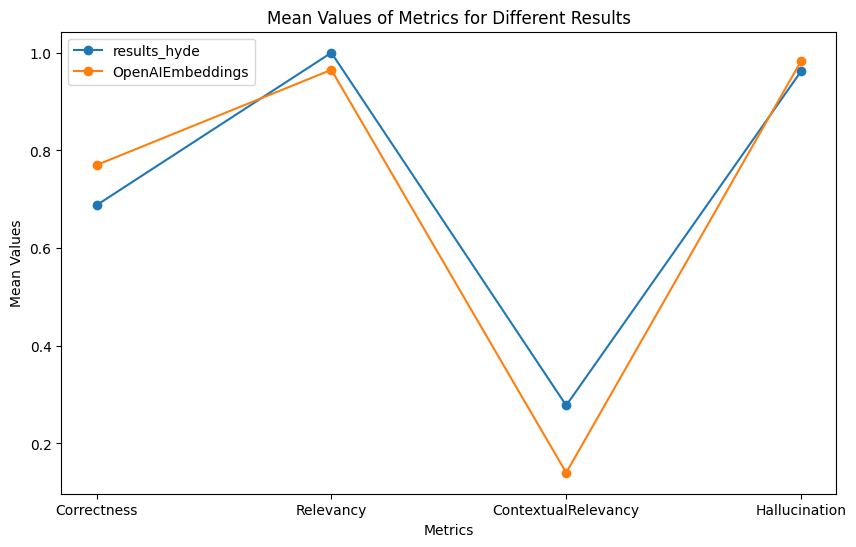

In [96]:
import matplotlib.pyplot as plt

# ÁªòÂà∂ÊäòÁ∫øÂõæ
plt.figure(figsize=(10, 6))

# ÂÆö‰πâÊåáÊ†á
metrics = list(mean_hyde.keys())

# ÁªòÂà∂ÂêÑÊù°Á∫ø
plt.plot(metrics, list(mean_hyde.values()), marker='o', label='results_hyde')
plt.plot(metrics, list(mean_emb1.values()), marker='o', label='OpenAIEmbeddings')

# ËÆæÁΩÆÂõæ‰æãÂíåÊ†áÁ≠æ
plt.xlabel('Metrics')
plt.ylabel('Mean Values')
plt.title('Mean Values of Metrics for Different Results')
plt.legend()

# ÊòæÁ§∫ÂõæÂΩ¢
plt.show()

### Êï¥‰ΩìÊïàÊûúÂõæ

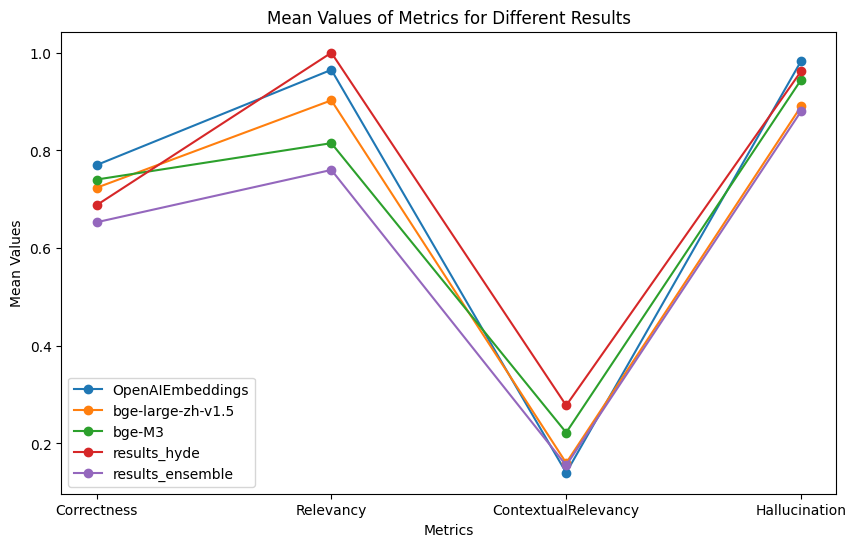

In [97]:
import matplotlib.pyplot as plt

# ÁªòÂà∂ÊäòÁ∫øÂõæ
plt.figure(figsize=(10, 6))

# ÂÆö‰πâÊåáÊ†á
metrics = list(mean_hyde.keys())

# ÁªòÂà∂ÂêÑÊù°Á∫ø

plt.plot(metrics, list(mean_emb1.values()), marker='o', label='OpenAIEmbeddings')
plt.plot(metrics, list(mean_emb2.values()), marker='o', label='bge-large-zh-v1.5')
plt.plot(metrics, list(mean_emb3.values()), marker='o', label='bge-M3')
plt.plot(metrics, list(mean_hyde.values()), marker='o', label='results_hyde')
plt.plot(metrics, list(mean_ensemble.values()), marker='o', label='results_ensemble')

# ËÆæÁΩÆÂõæ‰æãÂíåÊ†áÁ≠æ
plt.xlabel('Metrics')
plt.ylabel('Mean Values')
plt.title('Mean Values of Metrics for Different Results')
plt.legend()

# ÊòæÁ§∫ÂõæÂΩ¢
plt.show()